<a href="https://colab.research.google.com/github/anvichip/skin-lesion-classification/blob/main/Skin_lesions_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
!pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [00:40<00:00, 77.2MB/s]
100% 5.20G/5.20G [00:40<00:00, 137MB/s] 


In [7]:
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/HAM10000_metadata.csv')

In [10]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [11]:
null_columns = df.columns[df.isnull().any()]

# Print the columns with null values
print(null_columns)

Index(['age'], dtype='object')


In [12]:
null_count = df['age'].isnull().sum()
null_count

57

In [13]:
import pandas as pd

# Minimum value
minimum = df['age'].min()
# Maximum value
maximum = df['age'].max()
# Mean value
mean = df['age'].mean()
# Mode (returns a Series as there may be multiple modes)
mode = df['age'].mode()
# Median value
variance = df['age'].var(ddof=0)
median = df['age'].median()

# Print the results
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Mean:", mean)
print("Mode:", mode)
print("Median:", median)
print("Variance:", variance)

Minimum: 0.0
Maximum: 85.0
Mean: 51.863828077927295
Mode: 0    45.0
Name: age, dtype: float64
Median: 50.0
Variance: 287.90493581780174


In [14]:
# Handling null values
df['age'].fillna(value=int(df['age'].mean()), inplace=True)

In [15]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [16]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi (nv)',
    'mel': 'Melanoma (mel)',
    'bkl': 'Benign keratosis-like lesions (bkl)',
    'bcc': 'Basal cell carcinoma (bcc)',
    'akiec': 'Actinic keratoses and intraepithelial carcinoma (akiec)',
    'vasc': 'Vascular lesions (vasc)',
    'df': 'Dermatofibroma (df)'
}
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

In [17]:
import os
import glob

In [18]:
path = "/content/*/*.jpg"
base_skin_dir = '/content'

In [19]:
image_path_dic = {}
for filename in glob.glob(path):
  #x = os.path.basename(filename)
  x = os.path.splitext(os.path.basename(filename))[0]
  image_path_dic[str(x)] = filename

In [20]:
image_path_dic

{'ISIC_0032560': '/content/HAM10000_images_part_2/ISIC_0032560.jpg',
 'ISIC_0031947': '/content/HAM10000_images_part_2/ISIC_0031947.jpg',
 'ISIC_0032262': '/content/HAM10000_images_part_2/ISIC_0032262.jpg',
 'ISIC_0030675': '/content/HAM10000_images_part_2/ISIC_0030675.jpg',
 'ISIC_0030139': '/content/HAM10000_images_part_2/ISIC_0030139.jpg',
 'ISIC_0033488': '/content/HAM10000_images_part_2/ISIC_0033488.jpg',
 'ISIC_0033369': '/content/HAM10000_images_part_2/ISIC_0033369.jpg',
 'ISIC_0033389': '/content/HAM10000_images_part_2/ISIC_0033389.jpg',
 'ISIC_0031235': '/content/HAM10000_images_part_2/ISIC_0031235.jpg',
 'ISIC_0033533': '/content/HAM10000_images_part_2/ISIC_0033533.jpg',
 'ISIC_0030734': '/content/HAM10000_images_part_2/ISIC_0030734.jpg',
 'ISIC_0032292': '/content/HAM10000_images_part_2/ISIC_0032292.jpg',
 'ISIC_0029308': '/content/HAM10000_images_part_2/ISIC_0029308.jpg',
 'ISIC_0031265': '/content/HAM10000_images_part_2/ISIC_0031265.jpg',
 'ISIC_0029593': '/content/HAM1000

In [21]:
len(image_path_dic)

10015

In [22]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [23]:
# Adding cell_type and image_path columns
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['path'] = df['image_id'].map(image_path_dic.get)

In [24]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_2/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,Actinic keratoses and intraepithelial carcinom...,/content/HAM10000_images_part_2/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,Actinic keratoses and intraepithelial carcinom...,/content/HAM10000_images_part_2/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,Actinic keratoses and intraepithelial carcinom...,/content/HAM10000_images_part_2/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,Actinic keratoses and intraepithelial carcinom...,/content/HAM10000_images_part_2/ISIC_0032854.jpg


In [25]:
from PIL import Image
path = "/content/HAM10000_images_part_1/ISIC_0024306.jpg"
image = Image.open(path)

# Get the original size of the image
original_size = image.size

# Print the original size
print("Original size:", original_size)

Original size: (600, 450)


In [26]:
from PIL import Image
import numpy as np
# Adding image pixels
df['image_pixel'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((28,28))))

In [27]:
# from IPython.display import Image

# # Assuming you have the image file path stored in a variable named 'image_path'
# path = '/content/HAM10000_images_part_1/ISIC_0024306.jpg'
# Image(filename=path)
# # Display the image
# image.show()


In [28]:
# new_size = (28, 28)  # Specify the new size in pixels
# resized_image = image.resize(new_size)

# # Print the resized image
# resized_image.show()

In [29]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,path,image_pixel
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0027419.jpg,"[[[192, 153, 193], [195, 155, 192], [197, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0025030.jpg,"[[[27, 16, 32], [69, 49, 76], [122, 93, 126], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0026769.jpg,"[[[192, 138, 153], [200, 144, 162], [202, 142,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0025661.jpg,"[[[40, 21, 31], [95, 61, 73], [143, 102, 118],..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_2/ISIC_0031633.jpg,"[[[159, 114, 140], [194, 144, 173], [215, 162,..."
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,Actinic keratoses and intraepithelial carcinom...,/content/HAM10000_images_part_2/ISIC_0033084.jpg,"[[[183, 166, 182], [183, 165, 181], [184, 167,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,Actinic keratoses and intraepithelial carcinom...,/content/HAM10000_images_part_2/ISIC_0033550.jpg,"[[[3, 4, 2], [41, 36, 35], [119, 103, 102], [1..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,Actinic keratoses and intraepithelial carcinom...,/content/HAM10000_images_part_2/ISIC_0033536.jpg,"[[[134, 120, 120], [166, 148, 149], [175, 155,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,Actinic keratoses and intraepithelial carcinom...,/content/HAM10000_images_part_2/ISIC_0032854.jpg,"[[[160, 124, 145], [164, 131, 151], [166, 127,..."


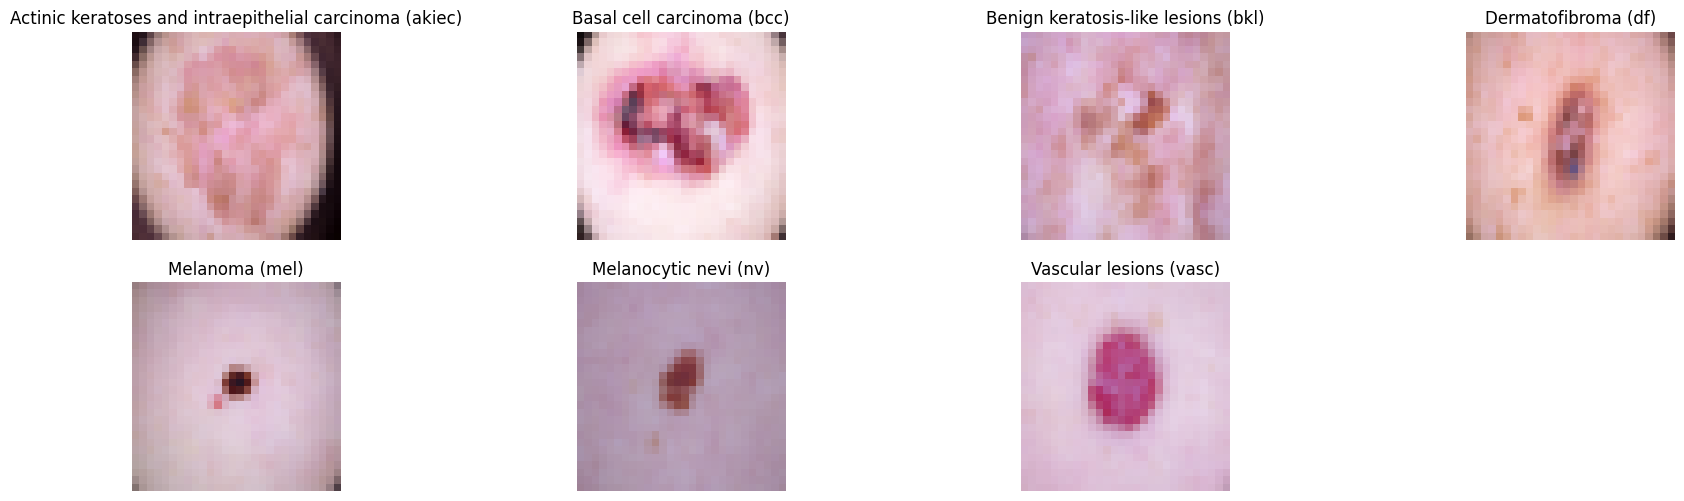

In [30]:
# Displaying 2 images for each label
import matplotlib.pyplot as plt
sample_df = df.groupby('dx').apply(lambda df: df.iloc[:1, [9, 7]])
plt.figure(figsize=(22, 32))
for i in range(7):
    plt.subplot(10, 4, i + 1)
    plt.imshow(np.squeeze(sample_df['image_pixel'][i]))
    img_label = sample_df['cell_type'][i]
    plt.title(img_label)
    plt.axis("off")
plt.show();

In [31]:
reverse_label_mapping = dict((value, key) for key, value in label_mapping.items())
df['label'] = df['dx'].map(reverse_label_mapping.get)
df = df.sort_values('label')
df = df.reset_index()

In [57]:
df

,index,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,path,image_pixel,label
0,5007,HAM_0006322,ISIC_0030309,nv,follow_up,55.0,male,foot,Melanocytic nevi (nv),/content/HAM10000_images_part_2/ISIC_0030309.jpg,"[[[237, 159, 171], [238, 158, 173], [241, 161,...",0
1,4478,HAM_0003084,ISIC_0026191,nv,follow_up,45.0,female,upper extremity,Melanocytic nevi (nv),/content/HAM10000_images_part_1/ISIC_0026191.jpg,"[[[219, 112, 131], [223, 119, 136], [224, 121,...",0
2,4477,HAM_0002093,ISIC_0027032,nv,follow_up,45.0,female,back,Melanocytic nevi (nv),/content/HAM10000_images_part_1/ISIC_0027032.jpg,"[[[234, 134, 155], [238, 140, 164], [234, 130,...",0
3,4476,HAM_0003701,ISIC_0027191,nv,follow_up,45.0,female,lower extremity,Melanocytic nevi (nv),/content/HAM10000_images_part_1/ISIC_0027191.jpg,"[[[214, 121, 154], [216, 124, 159], [218, 124,...",0
4,4475,HAM_0003806,ISIC_0028667,nv,follow_up,45.0,female,lower extremity,Melanocytic nevi (nv),/content/HAM10000_images_part_1/ISIC_0028667.jpg,"[[[234, 146, 167], [236, 149, 171], [233, 149,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
10010,1175,HAM_0003597,ISIC_0033422,df,consensus,45.0,male,lower extremity,Dermatofibroma (df),/content/HAM10000_images_part_2/ISIC_0033422.jpg,"[[[148, 137, 148], [158, 148, 159], [162, 153,...",6
10011,1176,HAM_0003597,ISIC_0027488,df,consensus,45.0,male,lower extremity,Dermatofibroma (df),/content/HAM10000_images_part_1/ISIC_0027488.jpg,"[[[191, 187, 200], [194, 190, 202], [192, 187,...",6
10012,1177,HAM_0003081,ISIC_0033808,df,consensus,45.0,male,abdomen,Dermatofibroma (df),/content/HAM10000_images_part_2/ISIC_0033808.jpg,"[[[179, 160, 194], [182, 162, 199], [188, 169,...",6
10013,1179,HAM_0003081,ISIC_0033860,df,consensus,45.0,male,abdomen,Dermatofibroma (df),/content/HAM10000_images_part_2/ISIC_0033860.jpg,"[[[16, 12, 17], [57, 47, 61], [111, 96, 116], ...",6


In [75]:
target_counts = df['label'].value_counts()
target_counts

0    6705
1    1113
2    1099
3     514
4     327
5     142
6     115
Name: label, dtype: int64

In [61]:
counter = 0
frames = [df]
for i in [4,4,11,17,45,52]:
    counter+=1
    index = df[df['label'] == counter].index.values
    df_index = df.iloc[int(min(index)):int(max(index)+1)]
    df_index = pd.concat([df_index] * i, ignore_index=True)
    #df_index = df_index.append([df_index]*i, ignore_index = True)
    frames.append(df_index)

final_df = pd.concat(frames)

In [80]:
final_df

,index,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,path,image_pixel,label
0,5007,HAM_0006322,ISIC_0030309,nv,follow_up,55.0,male,foot,Melanocytic nevi (nv),/content/HAM10000_images_part_2/ISIC_0030309.jpg,"[[[237, 159, 171], [238, 158, 173], [241, 161,...",0
1,4478,HAM_0003084,ISIC_0026191,nv,follow_up,45.0,female,upper extremity,Melanocytic nevi (nv),/content/HAM10000_images_part_1/ISIC_0026191.jpg,"[[[219, 112, 131], [223, 119, 136], [224, 121,...",0
2,4477,HAM_0002093,ISIC_0027032,nv,follow_up,45.0,female,back,Melanocytic nevi (nv),/content/HAM10000_images_part_1/ISIC_0027032.jpg,"[[[234, 134, 155], [238, 140, 164], [234, 130,...",0
3,4476,HAM_0003701,ISIC_0027191,nv,follow_up,45.0,female,lower extremity,Melanocytic nevi (nv),/content/HAM10000_images_part_1/ISIC_0027191.jpg,"[[[214, 121, 154], [216, 124, 159], [218, 124,...",0
4,4475,HAM_0003806,ISIC_0028667,nv,follow_up,45.0,female,lower extremity,Melanocytic nevi (nv),/content/HAM10000_images_part_1/ISIC_0028667.jpg,"[[[234, 146, 167], [236, 149, 171], [233, 149,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
5712178,1175,HAM_0003597,ISIC_0033422,df,consensus,45.0,male,lower extremity,Dermatofibroma (df),/content/HAM10000_images_part_2/ISIC_0033422.jpg,"[[[148, 137, 148], [158, 148, 159], [162, 153,...",6
5712179,1176,HAM_0003597,ISIC_0027488,df,consensus,45.0,male,lower extremity,Dermatofibroma (df),/content/HAM10000_images_part_1/ISIC_0027488.jpg,"[[[191, 187, 200], [194, 190, 202], [192, 187,...",6
5712180,1177,HAM_0003081,ISIC_0033808,df,consensus,45.0,male,abdomen,Dermatofibroma (df),/content/HAM10000_images_part_2/ISIC_0033808.jpg,"[[[179, 160, 194], [182, 162, 199], [188, 169,...",6
5712181,1179,HAM_0003081,ISIC_0033860,df,consensus,45.0,male,abdomen,Dermatofibroma (df),/content/HAM10000_images_part_2/ISIC_0033860.jpg,"[[[16, 12, 17], [57, 47, 61], [111, 96, 116], ...",6


In [81]:
target_counts = final_df['label'].value_counts()
target_counts

1    2478651
2    2416701
3     528906
4     214185
5      40470
6      26565
0       6705
Name: label, dtype: int64

In [32]:
# ORIGINAL DATA
# Converting image pixel columnm into required format
X = df['image_pixel'].to_numpy()
X = np.stack(X, axis=0)
Y = np.array(df.iloc[:, -1:])
print(X.shape)
print(Y.shape)

(10015, 28, 28, 3)
(10015, 1)


In [66]:
# ORIGINAL DATA
# Converting image pixel columnm into required format
X = final_df['image_pixel'].to_numpy()
X = np.stack(X, axis=0)
Y = np.array(final_df.iloc[:, -1:])
print(X.shape)
print(Y.shape)

(42446, 28, 28, 3)
(42446, 1)


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [68]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=40, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)
train_datagen.fit(X_train)
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(X_test)

In [69]:
import tensorflow as tf
from tensorflow import keras 
from google.colab import files
from keras.preprocessing import image
from keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator

In [70]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1,mode='auto')
                               #, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3,verbose=1, mode='auto')

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), input_shape = (28,28,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 5, 5, 64)         

In [72]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(33956, 28, 28, 3)
(33956, 1)
(8490, 28, 28, 3)
(8490, 1)


In [73]:
history = model.fit(
    X_train,
    Y_train,
    epochs=50,
    verbose=1,
    batch_size = 32,
    validation_split = 0.2,
    callbacks = [reduce_lr,early_stop]
    #callbacks=[callbacks],
)

Epoch 1/50
849/849 [==============================] - 30s 34ms/step - loss: 1.5906 - accuracy: 0.4190 - val_loss: 1.3216 - val_accuracy: 0.5097 - lr: 0.0010
Epoch 2/50
849/849 [==============================] - 28s 33ms/step - loss: 1.1447 - accuracy: 0.5568 - val_loss: 0.9684 - val_accuracy: 0.6157 - lr: 0.0010
Epoch 3/50
849/849 [==============================] - 28s 33ms/step - loss: 0.9494 - accuracy: 0.6387 - val_loss: 0.7481 - val_accuracy: 0.7382 - lr: 0.0010
Epoch 4/50
849/849 [==============================] - 29s 34ms/step - loss: 0.7935 - accuracy: 0.6969 - val_loss: 0.6106 - val_accuracy: 0.7827 - lr: 0.0010
Epoch 5/50
849/849 [==============================] - 28s 33ms/step - loss: 0.6890 - accuracy: 0.7391 - val_loss: 0.5128 - val_accuracy: 0.8163 - lr: 0.0010
Epoch 6/50
849/849 [==============================] - 28s 33ms/step - loss: 0.5941 - accuracy: 0.7744 - val_loss: 0.4610 - val_accuracy: 0.8379 - lr: 0.0010
Epoch 7/50
849/849 [==============================] - 29s 

<Figure size 640x480 with 0 Axes>

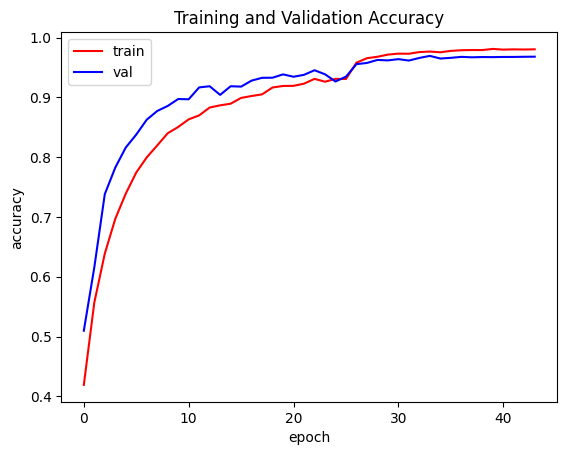

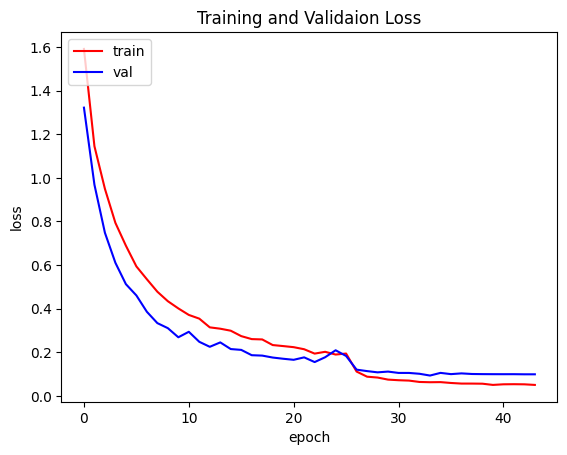

<Figure size 640x480 with 0 Axes>

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()